<a href="https://colab.research.google.com/github/karloxkronfeld/Finanzas/blob/main/Backtest(simple).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from pandas_datareader import data
import pandas as pd
from pylab import *

In [4]:
datos=data.DataReader("GC=F","yahoo","2020-01-01","2021-01-01")

In [11]:
alpha=pd.DataFrame(index=datos.index)
alpha["precio"]=datos["Adj Close"]
alpha["Diferencia"]=alpha.precio.diff()
alpha["signal"]=where(alpha.Diferencia>=0,1,0)

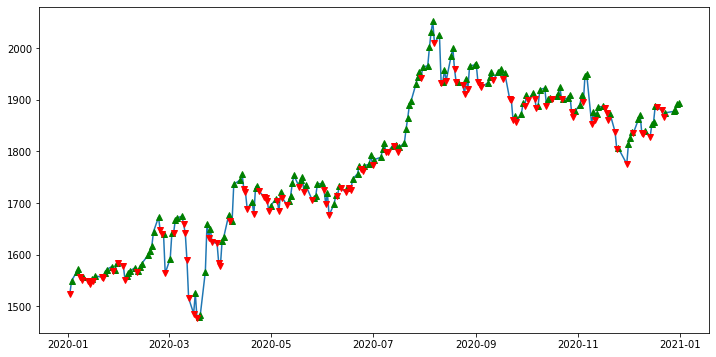

In [27]:
figure(figsize=(12,6))
plot(alpha.precio)
plot(alpha.loc[alpha.signal==1].index,alpha.precio[alpha.signal==1],"^", color="g")
plot(alpha.loc[alpha.signal==0].index,alpha.precio[alpha.signal==0],"v", color="r")

In [28]:
capital=1000
posicion=pd.DataFrame(index=alpha.index).fillna(0)
portafolio=pd.DataFrame(index=alpha.index).fillna(0)
posicion["ejemplo"]=alpha.signal
portafolio["posicion"]=(posicion.multiply(alpha.precio,axis=0))
portafolio["cash"]=capital-(posicion.diff().multiply(alpha.precio,axis=0).cumsum())
portafolio["total"]=portafolio.posicion + portafolio.cash

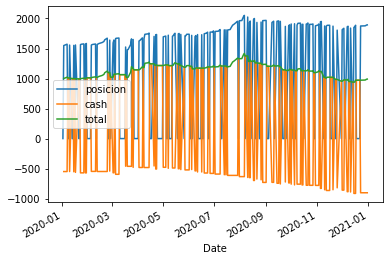

In [29]:
portafolio.plot()

In [30]:
portafolio

,posicion,cash,total
Date,,,
2020-01-02,0.000000,NaN,NaN
2020-01-03,1549.199951,-549.199951,1000.000000
2020-01-06,1566.199951,-549.199951,1017.000000
2020-01-07,1571.800049,-549.199951,1022.600098
2020-01-08,0.000000,1008.200073,1008.200073
...,...,...,...
2020-12-23,1874.699951,-902.500854,972.199097
2020-12-28,1877.199951,-902.500854,974.699097
2020-12-29,1879.699951,-902.500854,977.199097
